In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [3]:
ebola_df = pd.read_csv('Resources/ebola.csv')
ebola_df
#ebola_df.rename(columns={"Cumulative no. of confirmed, probable and suspected cases": "Cumulative cases", "Cumulative no. of confirmed, probable and suspected deaths": "Cumulative Deaths"})

,Country,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,648.0,430.0
1,Nigeria,2014-08-29,19.0,7.0
2,Sierra Leone,2014-08-29,1026.0,422.0
3,Liberia,2014-08-29,1378.0,694.0
4,Sierra Leone,2014-09-05,1261.0,491.0
...,...,...,...,...
2480,Liberia,2016-03-23,10666.0,4806.0
2481,Italy,2016-03-23,1.0,0.0
2482,Liberia,2016-03-23,5.0,4.0
2483,Nigeria,2016-03-23,20.0,8.0


In [4]:
#list of countries
ebola_df.Country.unique()

array(['Guinea', 'Nigeria', 'Sierra Leone', 'Liberia', 'Senegal',
       'United States of America', 'Spain', 'Mali', 'United Kingdom',
       'Italy'], dtype=object)

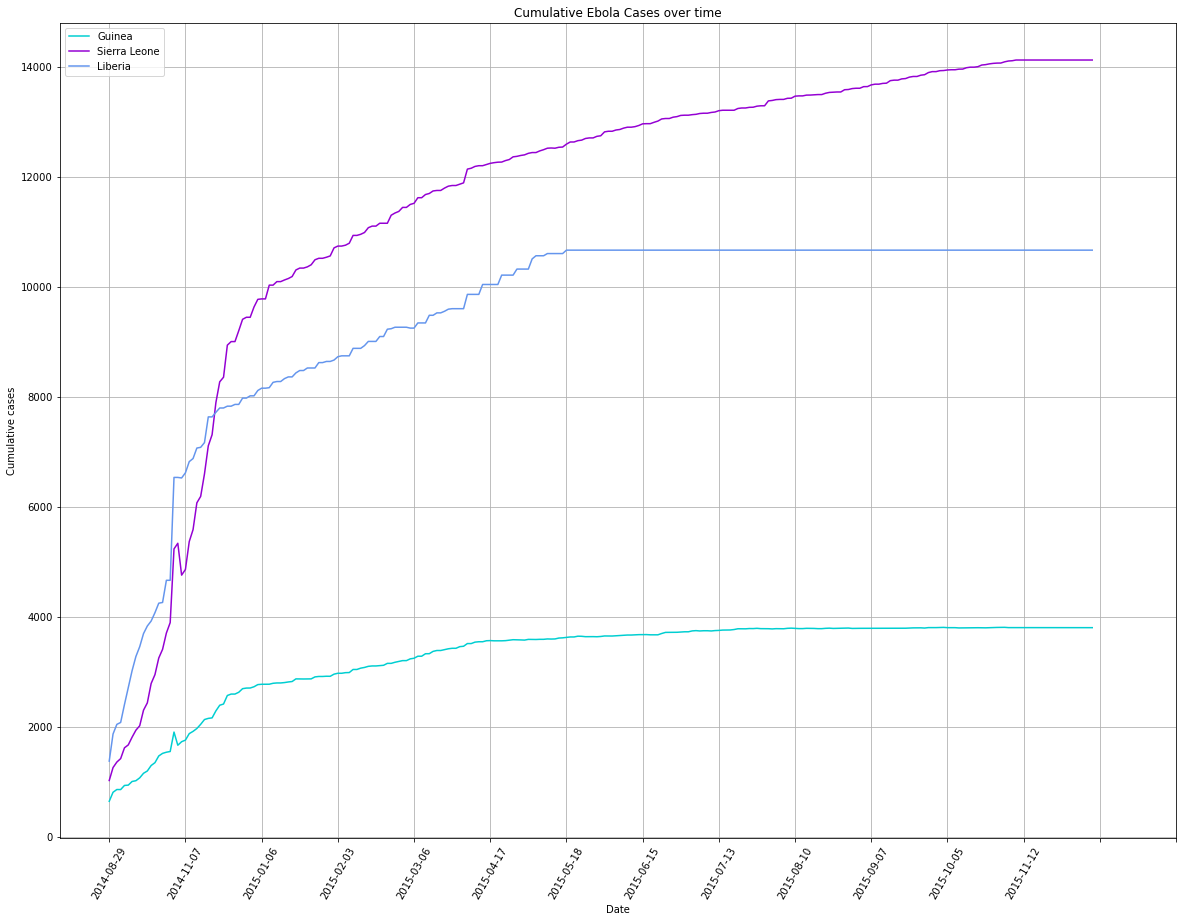

In [5]:
#Cumulative line graph of cases over time per country

#Countries with high number of cases
#Guinea
guinea_df=ebola_df.loc[ebola_df["Country"]=="Guinea"]
guinea_cases= guinea_df["Cumulative no. of confirmed, probable and suspected cases"]
x_axis1=guinea_df["Date"]
y_axis1=guinea_cases
fig= plt.figure(figsize=(20,15))
line1 = plt.plot(x_axis1, y_axis1, color="darkturquoise", label="Guinea")

#Sierra Leone
sierraleone_df=ebola_df.loc[ebola_df["Country"]=="Sierra Leone"]
sierraleone_cases= sierraleone_df['Cumulative no. of confirmed, probable and suspected cases']
x_axis3=sierraleone_df["Date"]
y_axis3=sierraleone_cases
line3 = plt.plot(x_axis3, y_axis3, color="darkviolet", label="Sierra Leone")

#Liberia
liberia_df=ebola_df.loc[ebola_df["Country"]=="Liberia"]
liberia_df=liberia_df.loc[liberia_df["Cumulative no. of confirmed, probable and suspected cases"]>=1378]
liberia_cases= liberia_df['Cumulative no. of confirmed, probable and suspected cases']
x_axis4=liberia_df["Date"]
y_axis4=liberia_cases
line4 = plt.plot(x_axis4, y_axis4, color="cornflowerblue", label="Liberia")


plt.legend(loc="best")
plt.ylabel('Cumulative cases')
plt.xlabel("Date")
plt.title('Cumulative Ebola Cases over time')

plt.xticks(np.arange(0, 300, step=20))
plt.xticks(rotation=60) 

plt.grid()
plt.show()


#Countries with low number of cases

# #Senegal
# senegal_df=ebola_df.loc[ebola_df["Country"]=="Senegal"]
# senegal_cases= senegal_df['Cumulative no. of confirmed, probable and suspected cases']
# x_axis5=senegal_df["Date"]
# y_axis5=senegal_cases
# fig= plt.figure(figsize=(20,15))
# line5 = plt.plot(x_axis5, y_axis5, color="red", label="Senegal")

# #Nigeria
# nigeria_df=ebola_df.loc[ebola_df["Country"]=="Nigeria"]
# nigeria_cases= nigeria_df['Cumulative no. of confirmed, probable and suspected cases']
# nigeria_df=nigeria_df.loc[nigeria_df["Cumulative no. of confirmed, probable and suspected cases"]>=19]
# x_axis2=nigeria_df["Date"]
# y_axis2=nigeria_cases
# line2 = plt.plot(x_axis2, y_axis2, color="darkblue", label="Nigeria")

# #USA
# usa_df=ebola_df.loc[ebola_df["Country"]=="United States of America"]
# usa_cases= usa_df['Cumulative no. of confirmed, probable and suspected cases']
# x_axis6=usa_df["Date"]
# y_axis6=usa_cases
# line6 = plt.plot(x_axis6, y_axis6, color="springgreen", label="United States")

# #Spain
# spain_df=ebola_df.loc[ebola_df["Country"]=="Spain"]
# spain_cases= spain_df['Cumulative no. of confirmed, probable and suspected cases']
# x_axis7=spain_df["Date"]
# y_axis7=spain_cases
# line7 = plt.plot(x_axis7, y_axis7, color="yellow", label="Spain")

# #Mali
# mali_df=ebola_df.loc[ebola_df["Country"]=="Mali"]
# mali_cases= mali_df['Cumulative no. of confirmed, probable and suspected cases']
# x_axis8=mali_df["Date"]
# y_axis8=mali_cases
# line8 = plt.plot(x_axis8, y_axis8, color="darkcyan", label="Mali")

# plt.legend(loc="best")
# plt.ylabel('Cumulative cases')
# plt.xlabel("Date")
# plt.title('Cumulative Ebola Cases over time')

# plt.xticks(np.arange(0, 300, step=20))
# plt.xticks(rotation=60) 

# plt.grid()
# plt.show()

#countries=['Guinea', 'Nigeria', 'Sierra Leone', 'Liberia', 'Senegal',
       #'United States of America', 'Spain', 'Mali', 'United Kingdom',
       #'Italy']

In [22]:
nigeria_df


,Country,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
1,Nigeria,2014-08-29,19.0,7.0
5,Nigeria,2014-09-05,22.0,8.0
13,Nigeria,2014-09-08,21.0,8.0
16,Nigeria,2014-09-12,21.0,8.0
22,Nigeria,2014-09-16,21.0,8.0
...,...,...,...,...
2430,Nigeria,2015-12-17,20.0,8.0
2440,Nigeria,2015-12-22,20.0,8.0
2460,Nigeria,2015-12-23,20.0,8.0
2471,Nigeria,2015-12-29,20.0,8.0


Text(0.5, 1.0, 'Cumulative Ebola Deaths over time')

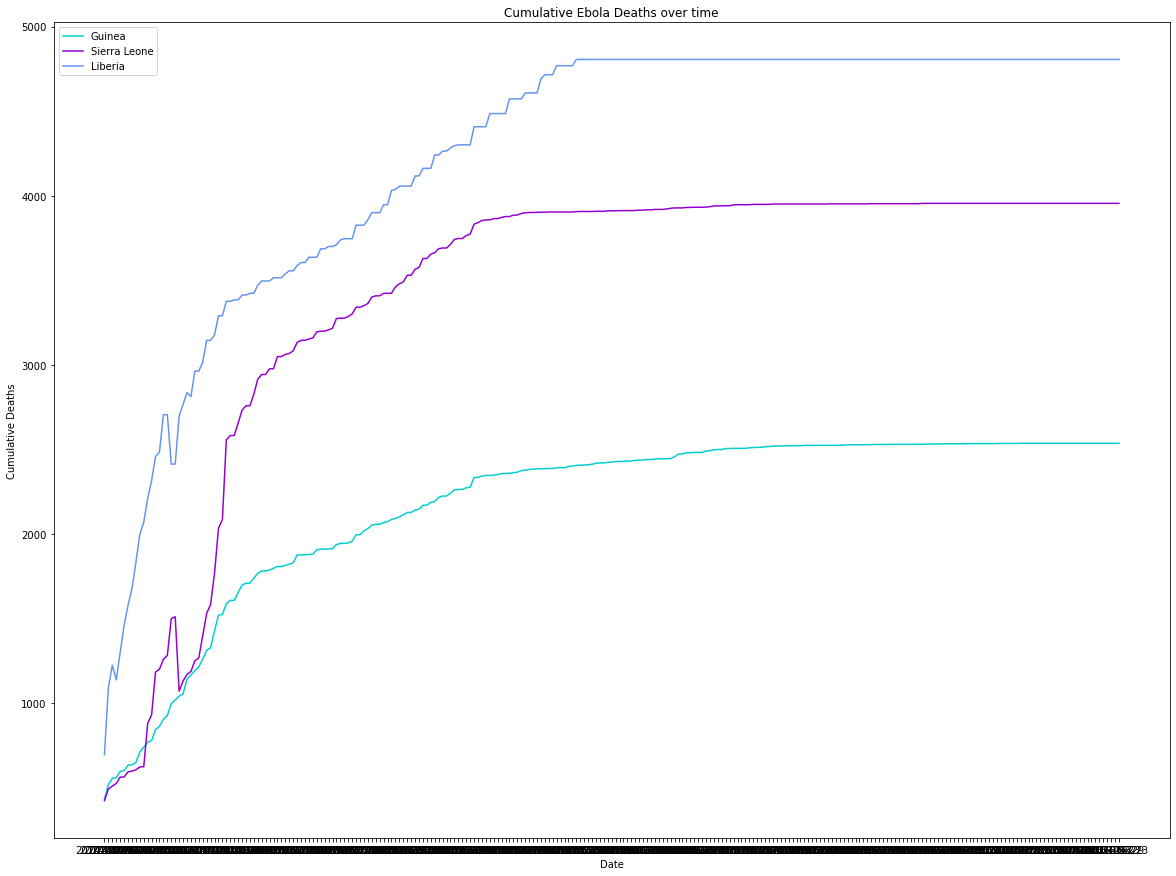

In [6]:
#Cumulative line graph of the number of deaths over time per country

#Guinea
guinea_df=ebola_df.loc[ebola_df["Country"]=="Guinea"]
guinea_deaths= guinea_df["Cumulative no. of confirmed, probable and suspected deaths"]
x_axis1=guinea_df["Date"]
y_axis1=guinea_deaths
fig= plt.figure(figsize=(20,15))
line1 = plt.plot(x_axis1, y_axis1, color="darkturquoise", label="Guinea")
#Sierra Leone
sierraleone_df=ebola_df.loc[ebola_df["Country"]=="Sierra Leone"]
sierraleone_deaths= sierraleone_df['Cumulative no. of confirmed, probable and suspected deaths']
x_axis3=sierraleone_df["Date"]
y_axis3=sierraleone_deaths
line3 = plt.plot(x_axis3, y_axis3, color="darkviolet", label="Sierra Leone")
#Liberia
liberia_df=ebola_df.loc[ebola_df["Country"]=="Liberia"]
liberia_df=liberia_df.loc[liberia_df["Cumulative no. of confirmed, probable and suspected cases"]>=694]
liberia_deaths= liberia_df['Cumulative no. of confirmed, probable and suspected deaths']
x_axis4=liberia_df["Date"]
y_axis4=liberia_deaths
line4 = plt.plot(x_axis4, y_axis4, color="cornflowerblue", label="Liberia")

plt.legend(loc="best")
plt.ylabel('Cumulative Deaths')
plt.xlabel("Date")
plt.title('Cumulative Ebola Deaths over time')

In [ ]:
# pie chart of cases per country

In [13]:
#bar chart of total cases per country
total_cases= ebola_df.groupby(["Country"])["Cumulative no. of confirmed, probable and suspected cases"].max()
total_cases

Country
Guinea                       3810.0
Italy                           1.0
Liberia                     10666.0
Mali                            8.0
Nigeria                        22.0
Senegal                         3.0
Sierra Leone                14122.0
Spain                           1.0
United Kingdom                  1.0
United States of America        4.0
Name: Cumulative no. of confirmed, probable and suspected cases, dtype: float64

Text(0.5, 1.0, 'Total ebola cases per country')

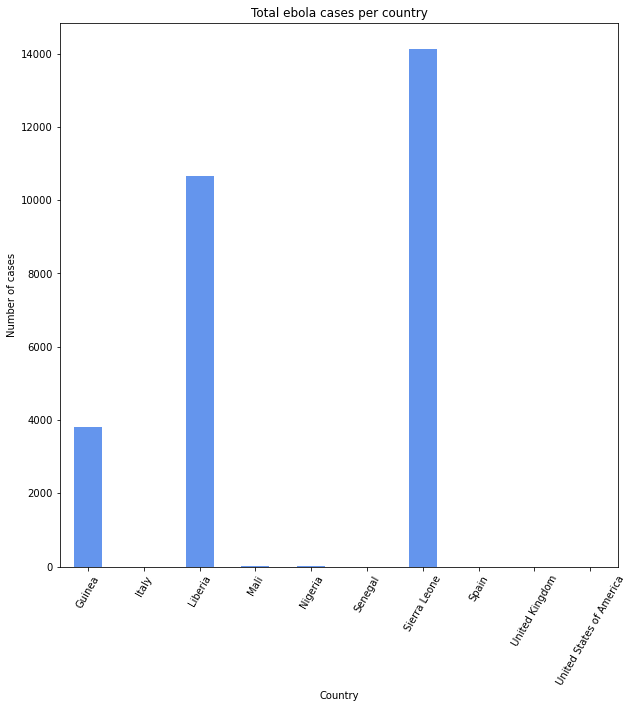

In [19]:
#bar graph
fig= plt.figure(figsize=(10,10))
total_cases.plot(kind="bar", color= 'cornflowerblue')
plt.xlabel("Country")
plt.xticks(rotation=60)
plt.ylabel("Number of cases")
plt.title("Total ebola cases per country")

In [16]:
ebola_pop = pd.read_csv('Resources/Population by country.csv')
ebola_pop
ebola_pop.rename(columns={"Country Name":"Country"})

,Country,Population (2014)
0,Spain,46480882
1,United Kingdom,64602298
2,Guinea,11150977
3,Italy,60789140
4,Liberia,4359505
5,Mali,16934220
6,Nigeria,176404902
7,Senegal,14174731
8,Sierra Leone,7017144
9,United States of America,318301008


In [ ]:
#erged_df= pd.merge(ebola_df,ebola_pop,left_on=None)
#merged_df= pd.merge(ebola_df,ebola_pop, left_on=None,how="inner")